# Thema 3 werkcollege 1: Word Embeddings
In dit werkcollege gaan we aan de slag met Word embeddings. Op de elo vind je een bestand `gamereviews.xlsx`met daarin 100.000 videogames reviews van Amazon (Orginenele bestand http://jmcauley.ucsd.edu/data/amazon/index_2014.html). Voor iedere revuew is het `sentiment` (1 positief; 0 negatief) bepaald op het aantal gegeven sterren (1-2 negatief; 4-5 positief) Verder bevat het bestand een kolom `reviewText` met daarin de daadwerkelijke review. We gaan proberen om op basis de text proberen te voorspellen of een review positief of negatief is. 
- lees het bestand in
- maak een variabele `text`aan met daarin de reviews als string
- maak een variabele `sentiment` aan met daarin een 1 als er 4 of 5 sterren gegeven zijn en een 0 als er 1 of 2 sterren gegeven zijn. Geef deze als type int 

In [19]:
# Importeren van benodigde libraries
import pandas as pd
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
# lees het bestand gamereviews in in een pandas dataframe
# Split deze in een variabele text en een variabele sentiment met daarin de sentimenten
df = pd.read_excel('gamereviews.xlsx', index_col="Unnamed: 0")

df.head()

,sentiment,reviewText
0,0,"If you're looking for immersive gameplay, good..."
1,0,The zippers on this bag are terrible. I ordere...
2,1,"If you need a good intro to Wii games, this is..."
3,1,This game has brought back so many great memor...
4,1,True Crime: Streets of LA was my first experie...


In [6]:
df.columns

Index(['sentiment', 'reviewText'], dtype='object')

In [14]:
df.dropna(inplace=True)
df.isna().sum()

sentiment     0
reviewText    0
dtype: int64

In [12]:
df = df.astype({"reviewText":"string"})
df.dtypes

sentiment              int64
reviewText    string[python]
dtype: object

We hebben nu 100.000 reviews, waarvan er 50.000 positief zijn. We gaan nu de tokenizen zodat ieder woord een eigen integer waarde krijgt. 

In [15]:
#tokenize de tekst ga uit van max 10.000 woorden
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['reviewText'])
tokenizer.word_index

{'the': 1,
 'and': 2,
 'to': 3,
 'a': 4,
 'of': 5,
 'i': 6,
 'game': 7,
 'is': 8,
 'you': 9,
 'it': 10,
 'this': 11,
 'in': 12,
 'that': 13,
 'for': 14,
 'are': 15,
 'but': 16,
 'with': 17,
 'on': 18,
 'have': 19,
 'as': 20,
 'not': 21,
 'was': 22,
 'be': 23,
 'all': 24,
 'if': 25,
 'your': 26,
 'like': 27,
 'so': 28,
 'one': 29,
 'can': 30,
 'or': 31,
 'games': 32,
 'my': 33,
 'just': 34,
 'they': 35,
 'get': 36,
 'at': 37,
 'there': 38,
 'play': 39,
 'from': 40,
 "it's": 41,
 'out': 42,
 'will': 43,
 'more': 44,
 'up': 45,
 'an': 46,
 'time': 47,
 'has': 48,
 'no': 49,
 'when': 50,
 'very': 51,
 'good': 52,
 'even': 53,
 'some': 54,
 'great': 55,
 'only': 56,
 'about': 57,
 'me': 58,
 'do': 59,
 'really': 60,
 'what': 61,
 "don't": 62,
 'first': 63,
 'fun': 64,
 'which': 65,
 'other': 66,
 'by': 67,
 'much': 68,
 'would': 69,
 'graphics': 70,
 'them': 71,
 '2': 72,
 'also': 73,
 'than': 74,
 'had': 75,
 'because': 76,
 'well': 77,
 'then': 78,
 'new': 79,
 'its': 80,
 'after': 81,
 '

Nu hebben we eerder al gezien dat niet alle reviews even lang zijn. Daarom gaan we deze aanvullen (padding) naar 50 woorden. Lange reviews worden afgekapt. Ivm de performance beperken we ons hier tot de 1e 50 woorden.

In [17]:
#vul de reviews aan tot 50 woorden
sequences = tokenizer.texts_to_sequences(df['reviewText'])
sequences

[[25,
  150,
  256,
  14,
  2521,
  117,
  52,
  91,
  2,
  70,
  78,
  62,
  94,
  11,
  7,
  37,
  63,
  6,
  279,
  11,
  69,
  23,
  4,
  1076,
  2184,
  1809,
  109,
  65,
  69,
  23,
  494,
  76,
  13,
  22,
  4,
  55,
  7,
  689,
  11,
  7,
  134,
  53,
  23,
  227,
  88,
  1,
  108,
  3062,
  63,
  109,
  1,
  70,
  15,
  34,
  495,
  222,
  198,
  387,
  17,
  71,
  16,
  113,
  83,
  18,
  46,
  436,
  451,
  192,
  1,
  70,
  152,
  23,
  55,
  6,
  69,
  53,
  19,
  3,
  132,
  1,
  1,
  70,
  18,
  1076,
  2184,
  14,
  1,
  230,
  15,
  89,
  1,
  3130,
  22,
  384,
  2,
  2446,
  51,
  52,
  41,
  92,
  122,
  13,
  11,
  180,
  1661,
  18,
  88,
  1,
  742,
  5,
  1,
  7,
  1,
  461,
  8,
  7607,
  2559,
  25,
  113,
  83,
  4,
  2103,
  1484,
  7,
  65,
  11,
  8,
  78,
  418,
  1432,
  3,
  19,
  4,
  91,
  144,
  14,
  2120,
  498,
  6,
  69,
  133,
  500,
  1654,
  88,
  4,
  1985,
  112,
  6,
  34,
  75,
  3,
  335,
  427,
  12,
  2187,
  201,
  13,
  22,
  265,
  

In [18]:
padded_sequence = pad_sequences(sequences, maxlen=50)
padded_sequence[0]

array([   3,   23,    2,  356,   34,  100,   49,  552,   18,    1, 1264,
         11,    7, 1645,   20,  169,   10,   69,   23,   51,   52,    2,
          6, 1780,   13,   10,   75,    1, 1155,    3,   23,   51,   52,
         41,   92,  122,   13,   28,   99,  154,  104, 4329,    2,  144,
         11,   88,    4, 1005,  122,    7])

We gaan nu sequentieel model bouwen en fitten. Het model bestaat uit een embedding layer, een flatten layer en sluit af met een Dense layer met 1 neuron. De embedding layer geven we 10.000 woorden als max en 100 dimensies. 

In [20]:
#bouw een model met een embedding layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=100, input_length=50),  # Embedding layer
    tf.keras.layers.Flatten(),  # Flatten layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron
])

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
#compile en fit het model. epochs=10 validation_split=0.2
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7972 - loss: 0.4274 - val_accuracy: 0.8793 - val_loss: 0.2901
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9220 - loss: 0.2050 - val_accuracy: 0.8851 - val_loss: 0.2891
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9707 - loss: 0.0987 - val_accuracy: 0.8800 - val_loss: 0.3417
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9881 - loss: 0.0457 - val_accuracy: 0.8698 - val_loss: 0.4179
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9915 - loss: 0.0305 - val_accuracy: 0.8749 - val_loss: 0.4591
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.9945 - loss: 0.0200 - val_accuracy: 0.8710 - val_loss: 0.5257
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.8630 - val_loss: 0.5895
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9960 - loss: 0

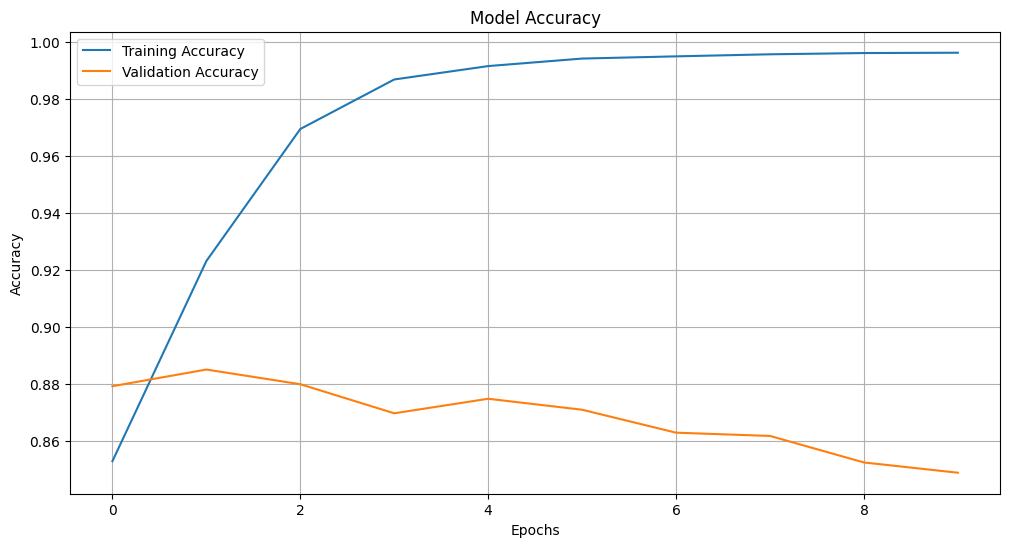

In [22]:
#plot de accuracy en validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Wat valt hier op? 

*"De validatie acc gaat vrijwel gelijk naar beneden vanaf 1 Epoch"*.

We testen ons model ook even met een paar eigenbedachte tweets. Schrijf hiervoor de code

In [23]:
#test een zelfbedachte tweet. Zorg ervoor dat er negative of positive uitkomt

# Definieer een functie om de sentiment van zelfbedachte tweets te voorspellen
def predict_tweet_sentiment(tweet):
    # Zet de tweet om naar een sequentie
    tweet_sequence = tokenizer.texts_to_sequences([tweet])
    # Vul de sequentie aan
    padded_tweet = pad_sequences(tweet_sequence, maxlen=50)
    # Maak de voorspelling
    prediction = model.predict(padded_tweet)
    # Interpreteer het resultaat
    sentiment = 'Positief' if prediction[0][0] > 0.5 else 'Negatief'
    return sentiment

# Test het model met zelfbedachte tweets
custom_tweets = [
    "Ik heb deze game absoluut geweldig gevonden! De graphics zijn prachtig en de gameplay is zo leuk!",  # Positief
    "Deze game was een complete verspilling van tijd. Ik heb elke minuut ervan gehaat.",  # Negatief
    "Het verhaal was redelijk, maar de bediening was frustrerend.",  # Kan ambigu zijn, maar meestal negatief
    "Geweldige ervaring! Ik zou het zeker aanbevelen aan mijn vrienden!"  # Positief
]

# Geef de voorspellingen weer
for tweet in custom_tweets:
    result = predict_tweet_sentiment(tweet)
    print(f'Tweet: "{tweet}" => Sentiment: {result}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Tweet: "Ik heb deze game absoluut geweldig gevonden! De graphics zijn prachtig en de gameplay is zo leuk!" => Sentiment: Positief
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Tweet: "Deze game was een complete verspilling van tijd. Ik heb elke minuut ervan gehaat." => Sentiment: Negatief
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tweet: "Het verhaal was redelijk, maar de bediening was frustrerend." => Sentiment: Positief
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Tweet: "Geweldige ervaring! Ik zou het zeker aanbevelen aan mijn vrienden!" => Sentiment: Positief


Vaak heb je onvoldoende data om zelf alles te trainen. Gelukkig is dit voor Engels al veelvuldig gedaan. Een bekend voorbeeld hiervan is GloVe (Global Vectors for words). We beginnen daarom met het downloaden van Glove [https://nlp.stanford.edu/projects/glove/] en download de 2014 English Wikipedia. Dit is een zipfile met daarin 100-dimensionale vectors voor 400.000 engelse woorden.

In [24]:
#download glove. Pas het path aan en run de onderstaande code
import os
import numpy as np

embeddings_index = {}
f = open(os.path.join('glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
print(embeddings_index['the'])  #voorbeeld van een willekeurig woord

Found 400000 word vectors.
[-0.038194 -0.24487   0.72812  -0.39961   0.083172  0.043953 -0.39141
  0.3344   -0.57545   0.087459  0.28787  -0.06731   0.30906  -0.26384
 -0.13231  -0.20757   0.33395  -0.33848  -0.31743  -0.48336   0.1464
 -0.37304   0.34577   0.052041  0.44946  -0.46971   0.02628  -0.54155
 -0.15518  -0.14107  -0.039722  0.28277   0.14393   0.23464  -0.31021
  0.086173  0.20397   0.52624   0.17164  -0.082378 -0.71787  -0.41531
  0.20335  -0.12763   0.41367   0.55187   0.57908  -0.33477  -0.36559
 -0.54857  -0.062892  0.26584   0.30205   0.99775  -0.80481  -3.0243
  0.01254  -0.36942   2.2167    0.72201  -0.24978   0.92136   0.034514
  0.46745   1.1079   -0.19358  -0.074575  0.23353  -0.052062 -0.22044
  0.057162 -0.15806  -0.30798  -0.41625   0.37972   0.15006  -0.53212
 -0.2055   -1.2526    0.071624  0.70565   0.49744  -0.42063   0.26148
 -1.538    -0.30223  -0.073438 -0.28312   0.37104  -0.25217   0.016215
 -0.017099 -0.38984   0.87424  -0.72569  -0.51058  -0.52028  -0

Als het goed is zijn er nu 400000 vectors ingelezen. De volgende stap is het omzetten van de variabele embedding_index in een matrix die we aan een embedding layer kunnen voeren. Deze moet de vorm max_features, embedding_dim hebben. In dit geval dus 20.000 woorden en 100 dimensies.  

In [26]:
#Bestudeer, begrijp en run de onderstaande code

# Stap 1: Definieer max_features
max_features = 20000  # Aantal woorden dat we willen gebruiken

# Stap 2: Initialiseer de embedding_matrix
embedding_dim = 100
embedding_matrix = np.zeros((max_features, embedding_dim))  # Initialiseren met 0

# Stap 3: Vul de embedding_matrix
for word, i in tokenizer.word_index.items():
    if i < max_features:  # Zorg ervoor dat we niet buiten de index gaan
        embedding_vector = embeddings_index.get(word)  # Haal de vector op
        if embedding_vector is not None:  # Als het woord gevonden is
            embedding_matrix[i] = embedding_vector  # Vul de matrix

# Toon een voorbeeld van een vector
print(embedding_matrix[3])  # Voorbeeld van de vector voor het woord met index 3

[-1.89700007e-01  5.00239991e-02  1.90840006e-01 -4.91839983e-02
 -8.97369981e-02  2.10060000e-01 -5.49520016e-01  9.83769968e-02
 -2.01350003e-01  3.42409998e-01 -9.26769972e-02  1.60999998e-01
 -1.32679999e-01 -2.81599998e-01  1.87370002e-01 -4.29589987e-01
  9.60389972e-01  1.39719993e-01 -1.07809997e+00  4.05180007e-01
  5.05389988e-01 -5.50639987e-01  4.84400004e-01  3.80439997e-01
 -2.90549989e-03 -3.49420011e-01 -9.96960029e-02 -7.83680022e-01
  1.03629994e+00 -2.31399998e-01 -4.71210003e-01  5.71259975e-01
 -2.14540005e-01  3.59580010e-01 -4.83190000e-01  1.08749998e+00
  2.85239995e-01  1.24470003e-01 -3.92480008e-02 -7.67320022e-02
 -7.63429999e-01 -3.24090004e-01 -5.74899971e-01 -1.08930004e+00
 -4.18110013e-01  4.51200008e-01  1.21119998e-01 -5.13670027e-01
 -1.33489996e-01 -1.13779998e+00 -2.87680000e-01  1.67740002e-01
  5.58040023e-01  1.53869998e+00  1.88590009e-02 -2.97210002e+00
 -2.42160007e-01 -9.24950004e-01  2.19919991e+00  2.82339990e-01
 -3.47799987e-01  5.16210

Ons model blijft gelijk met eerder. Dus hier hoeven we niks aan te veranderen

We laden onze variabele embedding_matrix in als <u>weight</u> (tip: gebruik set_weights) bij de embedding layer [0].
Aangezien we de bestaande glove matrix willen gebruiken en niet opnieuw gaan trainen zetten we trainable op False

In [27]:
#gebruik de embedding_matrix als weigth bij de embed_layer en set trainable of false
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),  # Gebruik de embedding_matrix
    tf.keras.layers.Flatten(),  # Flatten layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer met 1 neuron
])

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


We compilen en fitten het model opnieuw.

In [28]:
#compile en fit het model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6995 - loss: 0.5776 - val_accuracy: 0.7617 - val_loss: 0.5044
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7788 - loss: 0.4828 - val_accuracy: 0.7644 - val_loss: 0.5063
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7868 - loss: 0.4700 - val_accuracy: 0.7638 - val_loss: 0.5104
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7902 - loss: 0.4644 - val_accuracy: 0.7642 - val_loss: 0.5128
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7900 - loss: 0.4611 - val_accuracy: 0.7551 - val_loss: 0.5497
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7934 - loss: 0.4581 - val_accuracy: 0.7592 - val_loss: 0.5262
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7948 - loss: 0.4597 - val_accuracy: 0.7616 - val_loss: 0.5374
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7925 - loss: 0.4593 - 

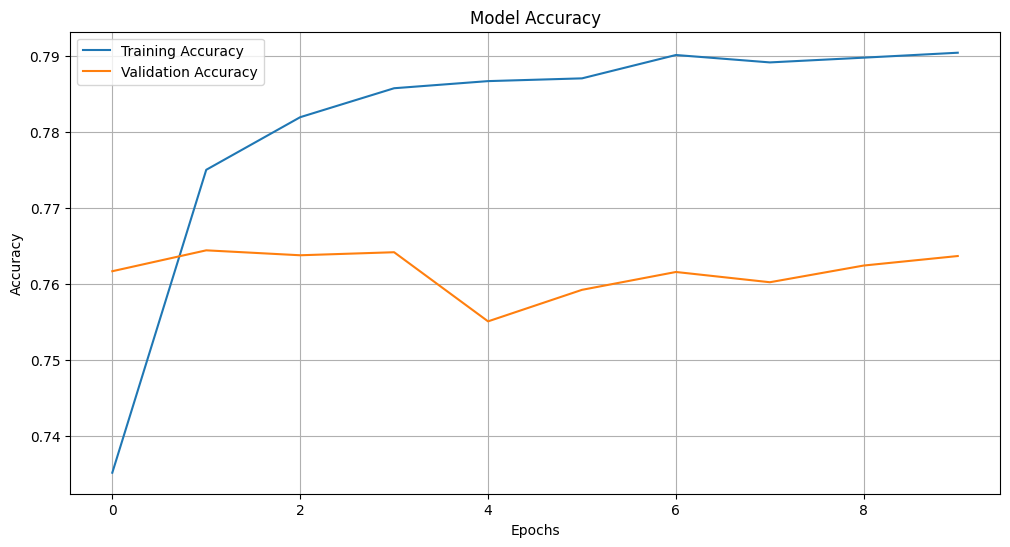

In [29]:
#plot de accuracy en validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

Wat valt hier op?

Hieronder volgt nog een leuk stukje visualisatie van wat GloVe precies allemaal doet

We beginnen met een lijstje met redelijk willekeurige woorden die we opzoeken in de GloVe dictionary. Dit geeft ons per word 50 verschilende waarden. Nu is een 50-dimensionale figuur vrij lastig te visualiseren, daarom reduceren we dit door middel van Principal Component Analysis tot 2 (zie https://en.wikipedia.org/wiki/Principal_component_analysis) en plotten we deze.

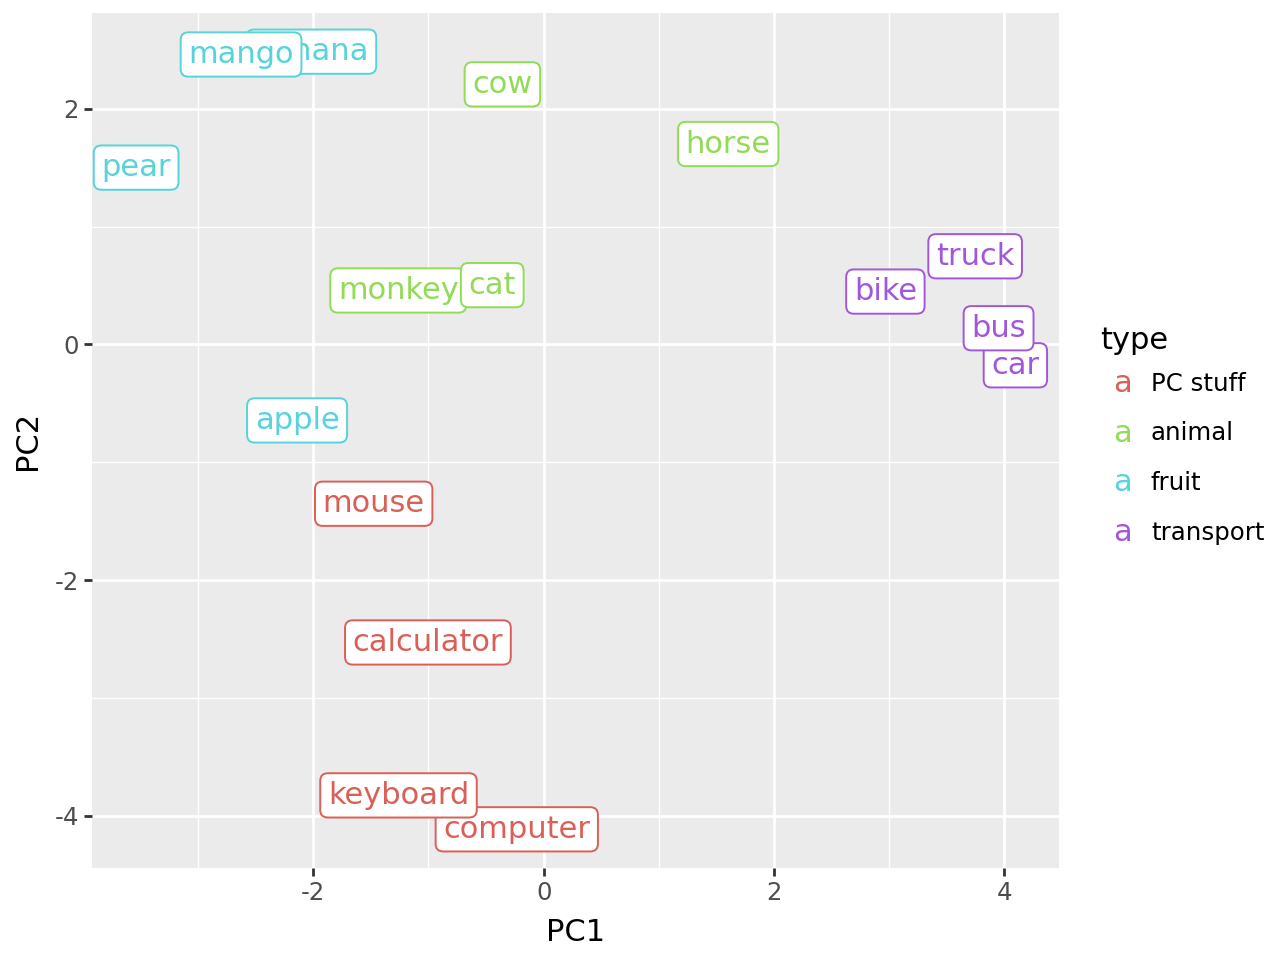

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from plotnine import *

words = ['horse', 'cow', 'monkey', 'cat', 'apple', 'banana', 'pear', 'mango',
         'car', 'bus', 'truck', 'bike', 'computer', 'calculator', 'keyboard', 'mouse']

plot_word = pd.DataFrame(PCA(n_components=2).fit_transform([embeddings_index[w] for w in words]),
                         columns=['PC1', 'PC2'])

plot_word['word'] = words
plot_word['type'] = list(pd.Series(['animal', 'fruit', 'transport', 'PC stuff']).repeat(4))

gg = (
    ggplot(plot_word, aes(x='PC1', y='PC2')) +
      geom_point(aes(color='type')) +
      geom_label(aes(label='word', color='type'))
)
gg

Wat hier opvalt is dat veel vervante woorden (zoals bijvoorbeeld de voertuigen) allemaal redelijk dicht bij elkaar liggen. Wat ook opvalt is dat 'apple' tussen de fruitsoorten en de computer onderdelen is geplaatst. Hetzelde geldt ook enigszins voor 'mouse'

Nu is zijn niet alleen losse woorden heel interessant, maar ook hoe woorden zich tot elkaar verhouden. Daarom plotten we in dit geval een aantal landen en hoofdsteden. wat hierbij opvalt is dat dat tussen liggende vector (verplaatsing op de x en de y-as) bij veel landen min of meer gelijk is.

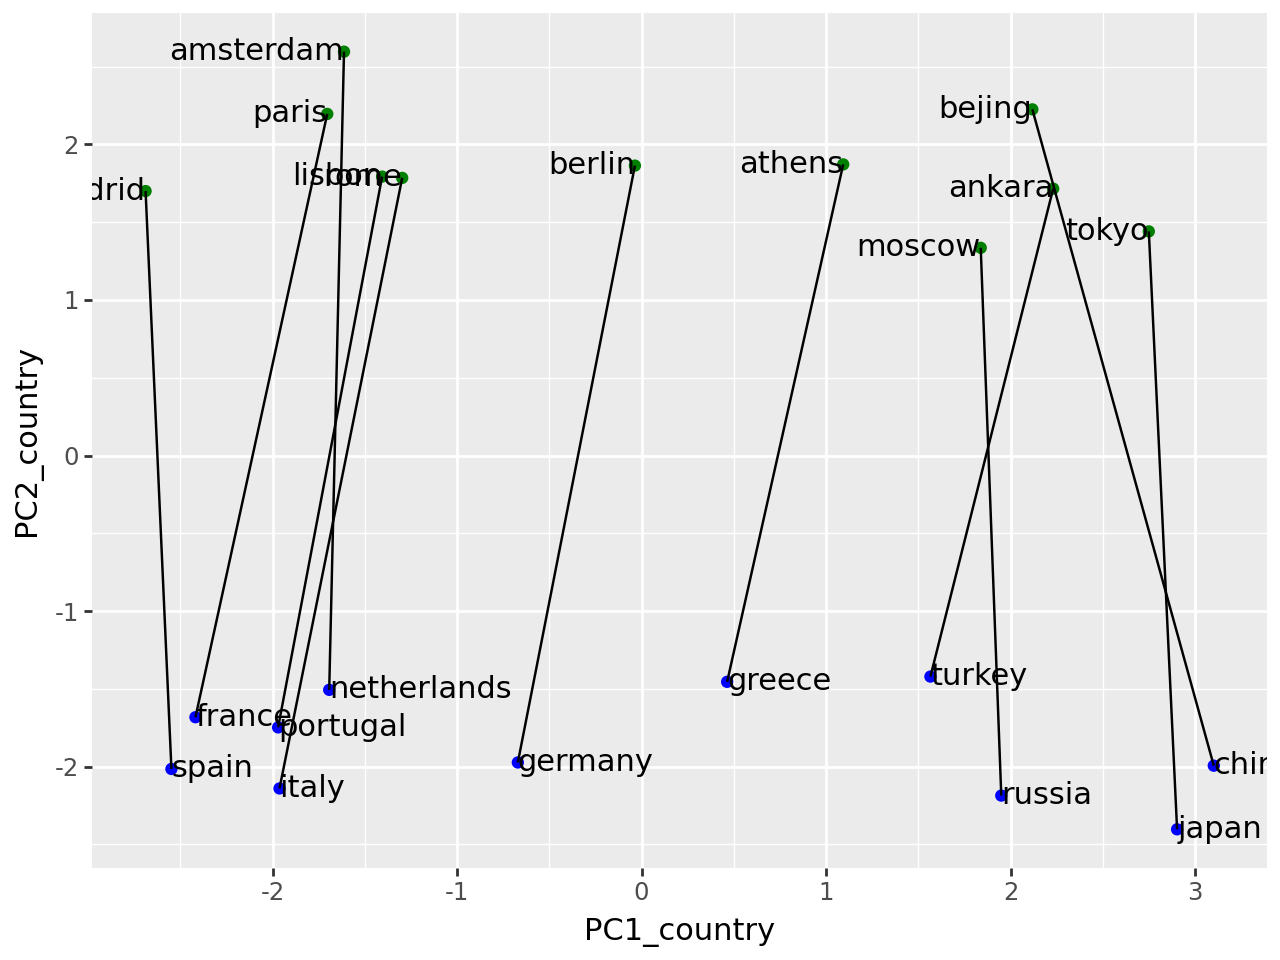

In [32]:
country_capitals = ['china', 'bejing', 'russia', 'moscow', 'japan', 'tokyo',
                    'turkey', 'ankara', 'spain', 'madrid', 'france', 'paris',
                    'portugal', 'lisbon', 'greece', 'athens', 'italy', 'rome',
                    'netherlands', 'amsterdam', 'germany', 'berlin']
plot_word = pd.DataFrame(PCA(n_components=2).fit_transform([embeddings_index[w] for w in country_capitals]),
                         columns=['PC1', 'PC2'])
plot_word['word'] = country_capitals
plot_word['concept'] = pd.Series(['country', 'capital'] * int(len(plot_word) / 2))
plot_word['country'] = list(pd.Series(['china', 'russia', 'japan', 'turkey', 'spain', 'france', 'portugal', 'greece', 'italy', 'netherlands', 'germany']).repeat(2))
plot_word = plot_word.pivot(index='country', columns='concept')  # Needed for plotting in plotnine
plot_word.columns = ['_'.join(col).strip() for col in plot_word.columns.values]

gg = (
    ggplot(plot_word) +
      geom_point(aes(x='PC1_country', y='PC2_country'), color='blue') +
      geom_text(aes(x='PC1_country', y='PC2_country', label='word_country'), ha='left') +
      geom_point(aes(x='PC1_capital', y='PC2_capital'), color='green') +
      geom_text(aes(x='PC1_capital', y='PC2_capital', label='word_capital'), ha='right') +
      geom_segment(aes(x = 'PC1_country', xend='PC1_capital', y='PC2_country', yend='PC2_capital'))
)
gg

Dit gaat zelfs zo ver dat we dat je hier min-of-meer mee kunt rekenen. Hieronder zie je wat er gebeurt als je 'paris' - 'france' + 'poland' uitrekend en dan als uitkomst het dichtsbijzijnde woord pakt. 

In [33]:
from scipy.spatial import cKDTree

# Represent the embeddings as a matrix, needed for search with cKDTree
word_indices = pd.Series(list(embeddings_index.keys()))
cKDTree_embedding_matrix = np.array(list(embeddings_index.values()))

# Perform some vector magic with embeddings
find_capital_poland = embeddings_index['paris'] - embeddings_index['france'] + embeddings_index['poland']
closest_word = cKDTree(cKDTree_embedding_matrix).query(find_capital_poland, k=1) #zoek de k dichtsbijzijnde neighbors op
word_indices[closest_word[1]]

'warsaw'

# Thema 3 werkcollege 2: Recurrent Neural Networks
Genoeg spielerij met word_embeddings en terug naar onze videogames dataset. Nu we onze data in een bruikbaar formaat hebben kunnen we ons netwerk verder gaan opbouwen en trainen. We beginnen met het toevoegen van onze 1e SimpleRNN layer.

In [34]:
#vervang de flatten layer met een SimpleRNN layer met 32 nodes
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.SimpleRNN(32),  # SimpleRNN layer met 32 nodes
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

c:\Users\esmee\OneDrive\Documents\Projecten\MachineLearning\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.


In [35]:
#compile en fit epochs = 3
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=3, validation_split=0.2)

Epoch 1/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.6462 - loss: 0.6198 - val_accuracy: 0.7326 - val_loss: 0.5342
Epoch 2/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7367 - loss: 0.5380 - val_accuracy: 0.6502 - val_loss: 0.6143
Epoch 3/3
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7036 - loss: 0.5669 - val_accuracy: 0.7802 - val_loss: 0.4850


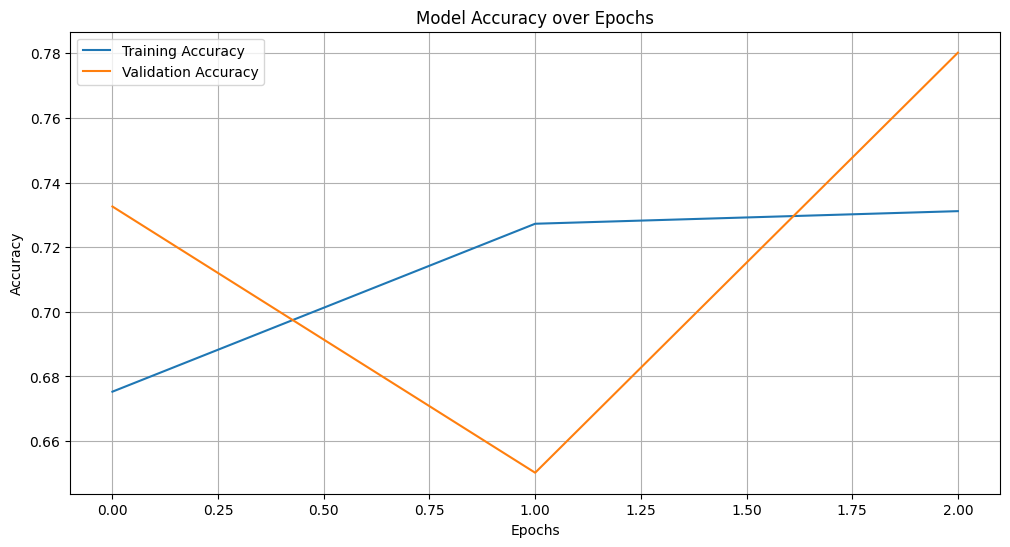

In [36]:
#plot de accuracy en validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

Wat valt hier op?

Eventueel kun je het netwerk nog wat dieper trainer door er 1 of meerdere extra SimpleRNN layers aan toe te voegen. Gezien de tijd die het trainen van dit netwerk zou kosten gaan we dat nu even niet doen. Mocht je het wel thuis willen proberen, let er dan op dat je de juiste output 'returned'.

Nu is een SimpleRNN eigenlijk wat te simpel om de complexiteit van tekst te vatten, daarom vervangen we onze simpleRNN_layer door een LSTM layer met voor het gemak ook maar 32 neurons.

In [37]:
#vervang de simpleRNN_layer door een LSTM_layer met 32 neurons epochs=10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.LSTM(32),  # LSTM layer met 32 neurons
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer voor binaire classificatie
])

In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.7487 - loss: 0.4946 - val_accuracy: 0.8463 - val_loss: 0.3527
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 62s 25ms/step - accuracy: 0.8527 - loss: 0.3382 - val_accuracy: 0.8607 - val_loss: 0.3188
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - accuracy: 0.8705 - loss: 0.3019 - val_accuracy: 0.8676 - val_loss: 0.3089
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 70s 28ms/step - accuracy: 0.8841 - loss: 0.2790 - val_accuracy: 0.8764 - val_loss: 0.2904
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.8909 - loss: 0.2602 - val_accuracy: 0.8797 - val_loss: 0.2830
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - accuracy: 0.8993 - loss: 0.2465 - val_accuracy: 0.8798 - val_loss: 0.2850
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9049 - loss: 0.2338 - val_accuracy: 0.8807 - val_loss: 0.2806
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.9097 -

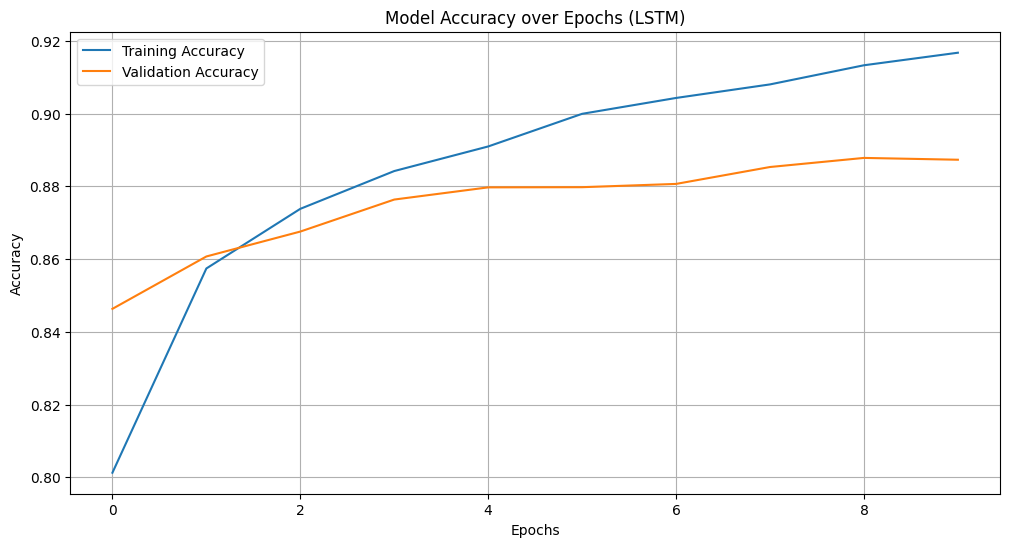

In [39]:
#plot de accuracy en validated accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## LSTM-Layer model

Wat valt hier op?

- Het model leert snel in de eerste paar epochs, maar overfit na ongeveer 6-8 epochs.
- De validation accuracy piekt rond 88-89% en daalt licht tegen het einde, terwijl de training accuracy blijft stijgen.
- Overfitting is een probleem dat hier opvalt, wat kan worden aangepakt door bijvoorbeeld regularisatie, dropout of een vroegstoppingsmechanisme te gebruiken.

We proberen het nog eens met een 2e LSTM-laag ook met 32 neurons (let weer op de return sequence).

In [40]:
#voeg een 2e LSTM laag toe, compile, fit en plot de (validated) accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.LSTM(32, return_sequences=True),  # Eerste LSTM laag met return_sequences=True
    tf.keras.layers.LSTM(32),  # Tweede LSTM laag zonder return_sequences
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer voor binaire classificatie
])

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 66s 25ms/step - accuracy: 0.7534 - loss: 0.4925 - val_accuracy: 0.8478 - val_loss: 0.3471
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 70s 28ms/step - accuracy: 0.8566 - loss: 0.3282 - val_accuracy: 0.8661 - val_loss: 0.3117
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 61s 24ms/step - accuracy: 0.8750 - loss: 0.2942 - val_accuracy: 0.8781 - val_loss: 0.2873
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 65s 26ms/step - accuracy: 0.8886 - loss: 0.2646 - val_accuracy: 0.8819 - val_loss: 0.2785
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 69s 28ms/step - accuracy: 0.8972 - loss: 0.2464 - val_accuracy: 0.8837 - val_loss: 0.2783
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9015 - loss: 0.2349 - val_accuracy: 0.8876 - val_loss: 0.2693
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9098 - loss: 0.2201 - val_accuracy: 0.8879 - val_loss: 0.2636
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 68s 27ms/step - accuracy: 0.9134 -

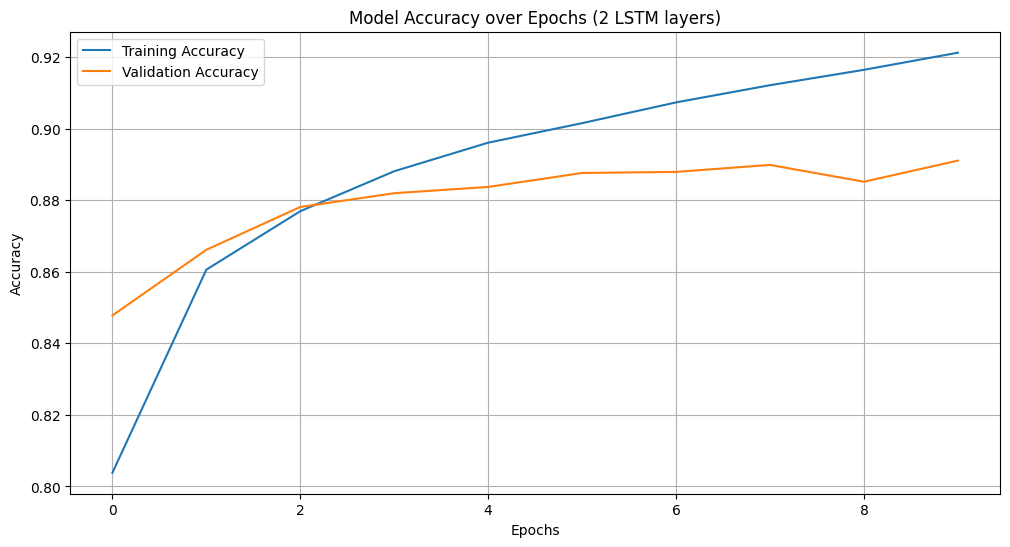

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (2 LSTM layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 2 LSTM Layers

Wat valt hier op?
- De training accuracy en validation accuracy zijn beide aanzienlijk verbeterd in vergelijking met het vorige model met slechts één LSTM-laag.
- Er lijkt minder kans op overfitting, aangezien de validation accuracy redelijk constant blijft.
- De losswaarden blijven dalen, wat erop wijst dat het model effectief leert.
- Het model kan nu meer complexe relaties in de data vastleggen door gebruik te maken van een diepere architectuur.

Voegt dit veel toe? 

Al met al biedt het tweede model met twee LSTM-lagen wat voordelen als we kijken naar de prestaties, generalisatie en stabiliteit van het leren in vergelijking met het model met een enkele LSTM-laag.

Een alternatief voor LSTM-layers zijn GRU-layer, vervang daarom de LSTM-layers door GRU-layers.

In [43]:
#Vervang de LSTM-layers door GRU-layers, compile, fit en plot de (validated) accuracy
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.GRU(32, return_sequences=True),  # Eerste GRU laag met return_sequences=True
    tf.keras.layers.GRU(32),  # Tweede GRU laag zonder return_sequences
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer voor binaire classificatie
])

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 94s 36ms/step - accuracy: 0.7567 - loss: 0.4784 - val_accuracy: 0.8366 - val_loss: 0.3615
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 133s 53ms/step - accuracy: 0.8622 - loss: 0.3160 - val_accuracy: 0.8720 - val_loss: 0.2967
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 177s 71ms/step - accuracy: 0.8816 - loss: 0.2808 - val_accuracy: 0.8768 - val_loss: 0.2896
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 126s 50ms/step - accuracy: 0.8906 - loss: 0.2603 - val_accuracy: 0.8675 - val_loss: 0.3061
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 141s 56ms/step - accuracy: 0.8979 - loss: 0.2448 - val_accuracy: 0.8853 - val_loss: 0.2701
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9062 - loss: 0.2281 - val_accuracy: 0.8871 - val_loss: 0.2655
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 149s 60ms/step - accuracy: 0.9106 - loss: 0.2162 - val_accuracy: 0.8916 - val_loss: 0.2637
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 116s 46ms/step - accuracy: 0.

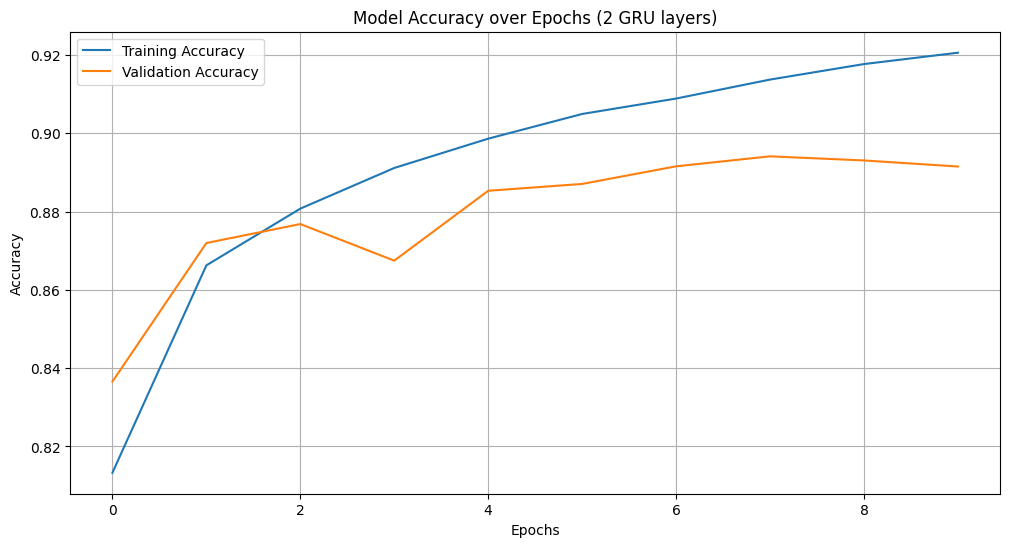

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (2 GRU layers)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 2 GRU Layers

Hoewel het GRU-model vergelijkbare training prestaties laat zien als het LSTM-model, is de validatie accuracy niet zo hoog. Dit kan wijzen op een minder goede generalisatiecapaciteit voor deze specifieke taak. LSTM-layers hebben de neiging om beter te presteren bij complexere sequentiële data-analyse, terwijl GRU-layers mogelijk sneller convergeren in minder complexe situaties. Afhankelijk van de specifieke toepassing en dataset kan de keuze tussen deze twee types van recurrente netwerken variëren. 

Wat zijn de verschillen t.o.v. ons model met LSTM layer? 

Aangezien ons model nog steeds overfit voegen we aan de 1e GRU-layer een dropout en een recurrent dropout van 0.2 toe. Ivm performance beperken we ons tot 2 epochs (het punt waar de vorige ging overfitten) en forceren we het model op de cpu te draaien. 

In [46]:
#Voeg aan de 1e GRU layer een dropout en recurrentdropout van 0.2 toe, compile fit en plot
#NB: beperkt je ivm de performance tot 2 epochs en forceer op cpu
# with tf.device('/cpu:0'):
#    history = model.fit(.....)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.GRU(32, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),  # Dropout en recurrent_dropout toegevoegd
    tf.keras.layers.GRU(32),  # Tweede GRU laag zonder dropout
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer voor binaire classificatie
])

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=2, validation_split=0.2)

Epoch 1/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 110s 42ms/step - accuracy: 0.6835 - loss: 0.5742 - val_accuracy: 0.8255 - val_loss: 0.3871
Epoch 2/2
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 131s 53ms/step - accuracy: 0.8167 - loss: 0.3965 - val_accuracy: 0.8501 - val_loss: 0.3388


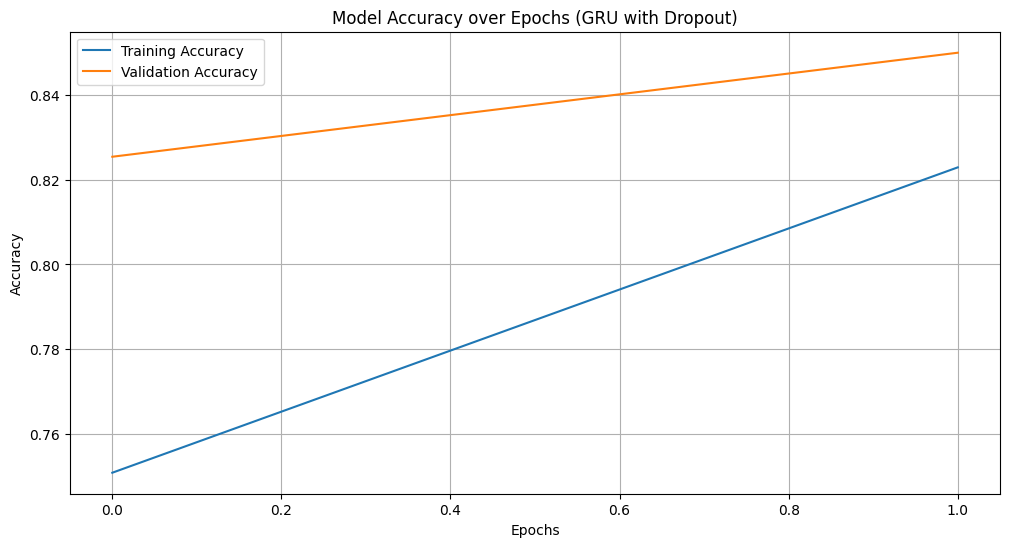

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (GRU with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## GRU met Dropout

Wat zien we gebeuren?

- Het toevoegen van dropout en recurrent_dropout aan de GRU-layers kan een positieve invloed hebben op de algehele generalisatie van het model, hoewel het kan leiden tot een lagere training accuracy in het begin.
- Het bi-directioneel maken van GRU-layers kan de prestaties van het model verder verbeteren door extra context te bieden, wat vooral nuttig kan zijn bij het verwerken van sequentiële gegevens zoals tekst.

Een andere optie om te verkennen is het bi-directioneel maken van 1 of beide GRU layers. Ivm de performance schrappen we de recurrent_dropout (de dropout blijft).

In [54]:
#maak beide GRU-layers bi-directional, schrap de recurrent_dropout. Compile, fit (10 epochs) en plot de (validated) accuracy.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32, dropout=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 99s 37ms/step - accuracy: 0.8415 - loss: 0.3545 - val_accuracy: 0.8623 - val_loss: 0.3165
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 139s 56ms/step - accuracy: 0.8536 - loss: 0.3335 - val_accuracy: 0.8683 - val_loss: 0.3031
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 124s 49ms/step - accuracy: 0.8618 - loss: 0.3166 - val_accuracy: 0.8751 - val_loss: 0.2893
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 123s 49ms/step - accuracy: 0.8700 - loss: 0.2981 - val_accuracy: 0.8797 - val_loss: 0.2812
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 150s 60ms/step - accuracy: 0.8731 - loss: 0.2928 - val_accuracy: 0.8859 - val_loss: 0.2736
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 114s 45ms/step - accuracy: 0.8804 - loss: 0.2798 - val_accuracy: 0.8892 - val_loss: 0.2650
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 87s 35ms/step - accuracy: 0.8833 - loss: 0.2717 - val_accuracy: 0.8885 - val_loss: 0.2633
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.8

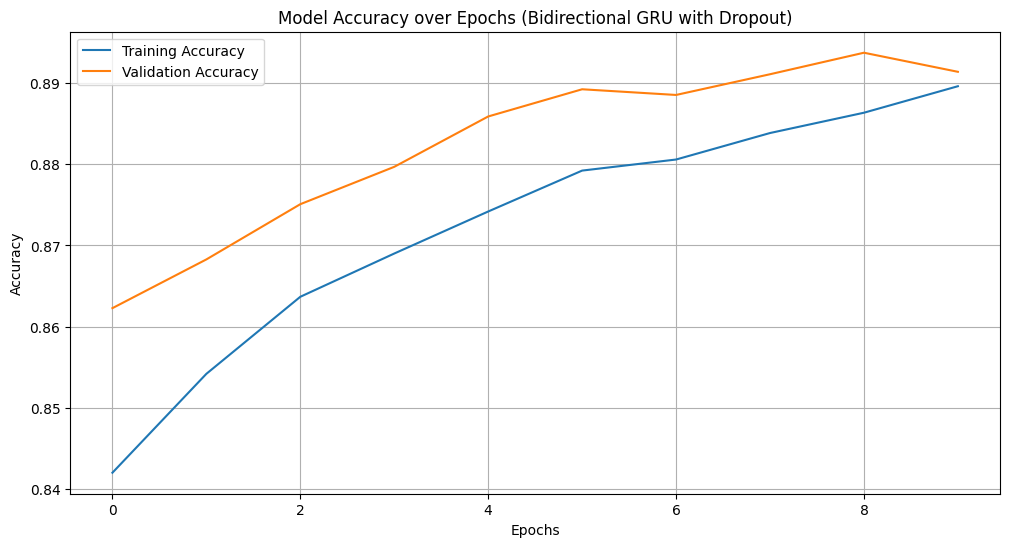

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (Bidirectional GRU with Dropout)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Bidirectional met GRU

Hoeveel effect heeft dit?

- Het bi-directionele GRU-model toont een aanzienlijke verbetering ten opzichte van de eerdere GRU-modellen en blijft competitief met de LSTM-modellen. Het vermogen om context vanuit beide richtingen te leren kan de performance van het model in tekstverwerkings- en sentimentanalyse taken verbeteren.

- Het model laat zien dat het goed in staat is om generalisatie te bereiken zonder veel overfitting, wat een belangrijk aspect is bij het werken met deep learning-modellen voor tekstclassificatie.

Tot slot kijken we naar het effect als we onze GRU-layers vervangen door conv1d_layers, met bijbehorende maxpooling 1d en flatten layers

In [51]:
#Vervang beide GRU layers door Conv1D_layers, een MaxPooling1d_layer, en een flatten_layer. Compile, Fit en Plot
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_features, output_dim=embedding_dim,
                              input_length=50, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_sequence, df['sentiment'], epochs=10, validation_split=0.2)

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7478 - loss: 0.4981 - val_accuracy: 0.8461 - val_loss: 0.3482
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8568 - loss: 0.3330 - val_accuracy: 0.8614 - val_loss: 0.3230
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8762 - loss: 0.2910 - val_accuracy: 0.8636 - val_loss: 0.3138
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8866 - loss: 0.2667 - val_accuracy: 0.8653 - val_loss: 0.3117
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8952 - loss: 0.2515 - val_accuracy: 0.8656 - val_loss: 0.3082
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9033 - loss: 0.2329 - val_accuracy: 0.8705 - val_loss: 0.3064
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9083 - loss: 0.2212 - val_accuracy: 0.8723 - val_loss: 0.3115
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9153 - loss: 0.

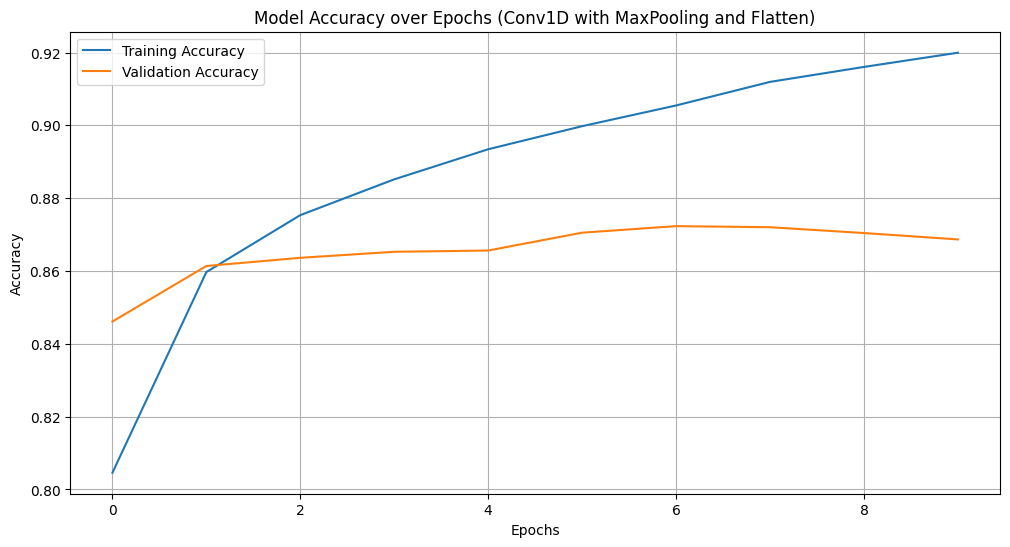

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs (Conv1D with MaxPooling and Flatten)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Conv1D met Maxpooling en Flatten

Hoeveel effect heeft dit? 

- Het Conv1D-model toont goede training prestaties, maar de validatie accuracy is niet competitief in vergelijking met de GRU- en LSTM-modellen. De daling in validatie accuracy en de niet-significante verbetering in validatie verlies wijzen op een risico van overfitting.

- Dit model kan nuttig zijn in scenario's waarin snelheid belangrijker is dan precisie. Voor een taak zoals tekstclassificatie, waar contextuele en sequentiële afhankelijkheden cruciaal zijn, zijn de GRU- en LSTM-modellen waarschijnlijk betere keuzes.

### Conclusie

Wat kun je zeggen over het gebruik van RNN-layers voor sentiment-analyse?

RNN-layers, vooral in de vorm van LSTM's en GRU's, zijn krachtige tools voor sentimentanalyse vanwege hun vermogen om sequentiële gegevens effectief te verwerken en relevante context te behouden. Wanneer ze goed zijn getraind en geconfigureerd, kunnen ze uitstekende prestaties leveren in sentimentanalyse-taken.

Toch is het cruciaal om de uitdagingen te begrijpen en technieken toe te passen die helpen bij het verbeteren van de modelprestaties en het voorkomen van overfitting. Uiteindelijk is het gebruik van RNN-layers voor sentimentanalyse zeer effectief, maar ze moeten zorgvuldig worden toegepast en afgestemd op de specifieke kenmerken van de dataset en de taak. 

---

In dit geval lijken de RNN layers een beperkt effect te hebben. Bij heel kleine datasets is het zo dat een bag-of-words benadering zoals met alleen een embedding het vaak beter doen RNN's. De belangrijkste oorzaak zit hem in <u>de hoeveelheid samples t.o.v. de gemiddelde sample lengte </u> (hier afgekapt op 100).  Een richtlijn uit cholet p349 is dat als het <u> aantal samples gedeeld door de gemiddelde sample length < 1500</u> een bag-of-words methode beter werkt dan een transformer of een RNN. In deze casus trainen we met 90.000 reviews en 50 woorden = 1800 waardoor we nog maar heel beperkt boven deze vuistregel zitten